# Analyse with Classification Tree

Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable. When the response variable is categorical (two levels), the model is a called a classification tree. Explanatory variables can be either quantitative, categorical or both.  Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable.
In order to perform a classification tree with the Gapminder data set, I had to first bin my response variable (breastcancerper100th) into 2 categories since this data is quantitative.
Here is the complete Python code:

In [42]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

In [43]:
#loading the dataset
AH_data = pd.read_csv('gapminder.csv')

In [44]:
#convert al entries to numeric
def analyse(ax):
    AH_data[ax] = pd.to_numeric(AH_data[ax], errors='coerce')

In [45]:
analyse('breastcancerper100th')
analyse('incomeperperson')
analyse('alcconsumption')
analyse('co2emissions')
analyse('femaleemployrate')
analyse('lifeexpectancy')
analyse('urbanrate')

## Build Target Variable with 2 Categories

In [46]:
#grouping breast cancer(response variable) into 2 categories
AH_data['breastcategories'] = pd.cut(AH_data['breastcancerper100th'], bins=[1, 40, 102], labels=False)
labels = np.array('0_Moderate 1_Strong'.split())
AH_data['breastcategories'] = pd.to_numeric(AH_data['breastcategories'], errors='coerce')

In [47]:
#Because decision tree analyses cannot handle any NA’s in our data set, my next step is to create a clean data frame that drops all NA’s.
data_clean = AH_data.dropna()

Setting the new data frame called data_clean, I can now take a look at various characteristics of my data by using the dtypes

In [48]:
print(data_clean.dtypes)

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate          object
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                  object
internetuserate          object
lifeexpectancy          float64
oilperperson             object
polityscore              object
relectricperperson       object
suicideper100th          object
employrate               object
urbanrate               float64
breastcategories        float64
dtype: object


## Examine data types and print summary statistics

In [49]:
print(data_clean.describe())

       incomeperperson  alcconsumption  breastcancerper100th  co2emissions  \
count       159.000000      159.000000            159.000000  1.590000e+02   
mean       7306.211771        6.862579             37.840881  6.237236e+09   
std       10557.944375        5.018234             23.256411  2.875501e+10   
min         103.775857        0.050000              3.900000  2.368667e+06   
25%         609.744287        2.725000             20.850000  8.375400e+07   
50%        2425.471293        6.120000             30.000000  2.835837e+08   
75%        8550.031767        9.990000             50.200000  2.413521e+09   
max       52301.587179       23.010000            101.100000  3.342209e+11   

       femaleemployrate  lifeexpectancy   urbanrate  breastcategories  
count        159.000000      159.000000  159.000000        159.000000  
mean          47.932075       69.459566   56.460377          0.339623  
std           14.859333        9.851101   22.239117          0.475077  
min      

## Set my Features and Target

In [50]:
predictors = data_clean[['incomeperperson', 'alcconsumption', 'co2emissions', 
                         'femaleemployrate', 'lifeexpectancy', 'urbanrate' ]]
targets = data_clean.breastcategories

## Build Training and Test Set

And then include the train test split function for predictors and target. And set the size ratio to 75% for the training sample and 25% for the test sample by indicating test_size=.25


In [51]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.25)

## Show the shape of our Training and Test Set

In [52]:
print('The shape of training predictor: {} and target: {}'.format(pred_train.shape, tar_train.shape))

The shape of training predictor: (119, 6) and target: (119,)


In [53]:
print('The shape of test predictor: {} and target: {}'.format(pred_test.shape, tar_test.shape))

The shape of test predictor: (40, 6) and target: (40,)


# Build model on training data

## Initialize the DecisionTreeClassifier from SKLearn and fit the model with training data points, predictors and targets

In [54]:
dtc=DecisionTreeClassifier().fit(pred_train,tar_train)

## Next we include the predict function where we predict for the test values

In [55]:
predictions=dtc.predict(pred_test)

## Build confusion matrix function with the target test set

In [56]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[24,  3],
       [ 3, 10]])

## Look at the accuracy score

In [57]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.84999999999999998

## Displaying the decision tree

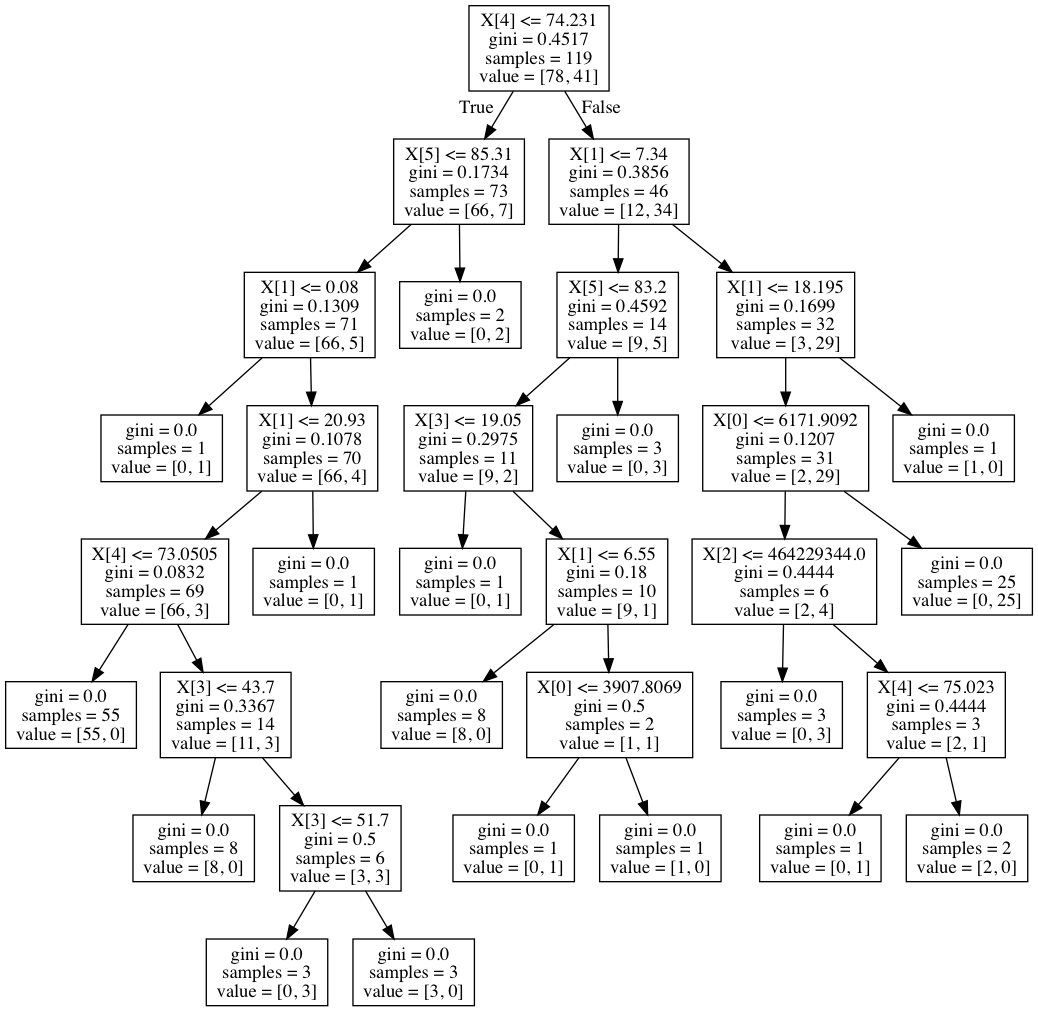

In [61]:
out = StringIO()
tree.export_graphviz(dtc, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

##Export on pdf file

In [62]:
graph.write_pdf('dtc.pdf')


True

# Analysis:


Let’s first look at the accuracy score, which is approximately 0.84. It suggests that the decision tree model has classified 84% of the sample correctly as either moderate cancer incidence or high cancer incidence.
For our predictor variable, the training sample has 119 rows and 6 explanatory variables, while the test sample has 40 rows and 6 explanatory variables.
The resulting tree starts with the split on X[4], our fifth explanatory variable, life expectancy. If the the value is greater than 74 years, we move to the right side of the split that include 46 of the 119 observations in the training sample. From this node, another split is made on our second explanatory variable, alcconsumption. In the same way, if the the alcohol consumption is less than 7.34, we move to the left side of the split that include 12 of the 34 observations in the training sample. From this node, another split is made on our third explanatory variable, co2emissions, and so the splits continue for the others explanatory variables.
It can be seen that among those countries that have life expectancy greater than 74.231 and alcohol consumption levels between 7.34 and 18.195, all of them were classified with strong cancer incidence [25, 0].

Note: train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior